## CS 429: Information Retrieval

<br>

### Dr. Aron Culotta
### Illinois Institute of Technology 
### Spring 2015

---


# What is Information Retrieval?

---

**The process of finding relevant data.**


Typically:

- text, though also images, video, audio


- *unstructured* (in contrast to relational databases)


- using a computer 

# Examples of Information Retrieval

<a href="http://google.com"><img src="https://www.google.com/images/srpr/logo11w.png" width="20%"></a>
<a href="http://apple.com"><img src="http://www.fatdex.net/php/wp-content/uploads/2008/11/3_osx_spotlight.jpg" width="30%"></a>
<img src="http://marketingchristianbooks.files.wordpress.com/2010/03/librarian.png" width="20%">
<a href="http://soundhound.com"><img src="http://a1.mzstatic.com/us/r30/Purple4/v4/04/f6/17/04f6170a-a577-dcc2-c554-b36076b8fe82/mzl.gqblbiin.png" width="20%"></a>
<a href="http://youtube.com"><img src="https://developers.google.com/youtube/images/YouTube_logo_standard_white.png" width="20%"></a>
<a href="http://eharmony.com"><img src="http://static3.businessinsider.com/image/4c91323c7f8b9a9a40e60300-1200/20-eharmony.jpg" width="30%"></a>
<a href="http://ciir-publications.cs.umass.edu/pub/web/getpdf.php?id=1066"><img src="files/goldberg.png" width="30%"></a>

# Architecture

   ![arch](files/arch.png)


# Simplest information retrieval problem


In [18]:
documents = ['dog', 'cat', 'zebra', 'cat']

In [19]:
def search(documents, query):
    return [doc for doc in documents if doc == query]

In [20]:
print search(documents, 'cat')

['cat', 'cat']


Runtime?

$T(n) = O(n)$ , where $n=$`len(documents)`.    **Can we do better?**

# Most documents have more than one word...

In [21]:
documents = [['dog', 'cat'], ['cat', 'zebra'], ['dog', 'puma']]

In [22]:
def search(documents, query):
    return [doc for doc in documents if query in doc]

In [23]:
print search(documents, 'cat')

[['dog', 'cat'], ['cat', 'zebra']]


Runtime?

Naive: $O(n*m)$ , where $n=$ `len(documents)` and $m=$ `max(len(d) for d in documents)`

# Inverted Index

Map from *word* $\rightarrow$ *Postings List*

**Postings List:** List of ids for documents containing the word.

In [24]:
# Map each word to the list of indices of documents that contain it.
index = {'dog': [0, 2],
         'cat': [0, 1],  # IDs are sorted. Why?
         'zebra': [1],
         'puma': [2]}

In [25]:
print index['dog']

[0, 2]


In [26]:
dir(index)

['__class__',
 '__cmp__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'has_key',
 'items',
 'iteritems',
 'iterkeys',
 'itervalues',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values',
 'viewitems',
 'viewkeys',
 'viewvalues']

In [27]:
def indexed_search(documents, index, query):
    return [documents[doc_id] for doc_id in index[query]]

In [28]:
print indexed_search(documents, index, 'cat')

[['dog', 'cat'], ['cat', 'zebra']]


**Runtime?**

$O(k)$ , where $k$ is number of matching documents.

# Building an Index


![index2](files/index2.png)

(Source: MRS)

# Query Processing

Most queries have more than one word:

**dog** AND **cat**

** Index:**
<br>
*dog* $\rightarrow \{0, 2\}$
<br>
*cat* $\rightarrow  \{0, 1\}$

In [29]:
def and_search(documents, index, queries):
    doc_ids = set([doc_id for doc_id in index[queries[0]]])
    for query in queries[1:]: # For remaining words in query
        doc_ids &= set([doc_id for doc_id in index[query]]) # Set intersection
    return [documents[doc_id] for doc_id in doc_ids]

In [30]:
print and_search(documents, index, ['cat', 'dog'])

[['dog', 'cat']]


**Runtime?**

Depends on set intersection computation.

# Merging Postings Lists

*dog* $\rightarrow \{0, 2, 4, 11, 31, 45, 173, 174\}$
<br>
*cat* $\rightarrow \{2, 31, 54, 101\}$

Intersection $\rightarrow \{2, 31\}$

**Idea**: maintain pointers to both lists and walk through both simultaneously

Running time: $O(x + y)$ , where $x$ and $y$ are lengths of two postings lists

# Query Optimization

Organize query processing efficiently.

*dog* $\rightarrow \{0, 2, 4, 11, 31, 45, 173, 174\}$
<br>
*cat* $\rightarrow \{2, 31, 54, 101\}$
<br>
*zebra* $\rightarrow \{31, 506\}$

**dog** AND **cat** AND **zebra**

Which order?

1. (**dog** AND **cat**) AND **zebra**
2. **dog** AND (**cat** AND **zebra**)
3. (**dog** AND **zebra**) AND **cat**

\#2 reduces work by processing rare words first.



What about **dog** AND NOT **cat**?

# Survey results

In [31]:
# survey.txt contains two tab-separated columns:
# <number of python programs written> <what you want to be when you grow up>
survey = [line.split('\t') for line in open('survey.txt')]
print survey[0]

['0', 'data scientist\n']


In [32]:
# Count frequency of responses to question "Approximately how many Python programs have you written?"
from collections import Counter
python_counts = Counter(float(x[0]) for x in survey)
print python_counts

Counter({0.0: 11, 5.0: 5, 30.0: 3, 100.0: 2, 1.0: 1, 2.0: 1, 3.0: 1, 6.0: 1, 10.0: 1, 20.0: 1})


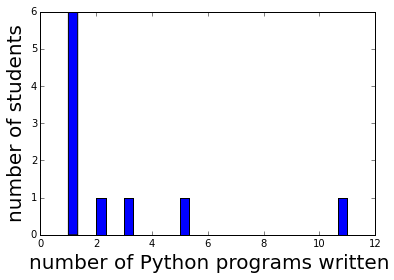

In [33]:
# Plot histogram of responses. 
import matplotlib.pyplot as plt # a plotting library
plt.figure()
plt.hist(python_counts.values(), 30)
plt.xlabel('number of Python programs written', size=20)
plt.ylabel('number of students', size=20)
plt.show()

In [34]:
# Count terms in responses to "What do you want to be when you grow up?"
import re
from pprint import pprint
term_counts = Counter()
for response in survey:
    term_counts.update(re.findall('\w+', response[1].lower()))
pprint(term_counts.most_common(15))

[('i', 17),
 ('to', 14),
 ('a', 14),
 ('and', 8),
 ('like', 7),
 ('software', 7),
 ('data', 6),
 ('the', 6),
 ('of', 5),
 ('want', 5),
 ('in', 5),
 ('p', 4),
 ('be', 4),
 ('engineer', 4),
 ('it', 4)]


# Course Information

- **GitHub** will be primary source of course information.
  - [https://github.com/iit-cs429/main](https://github.com/iit-cs429/main)
- Assignments turned in to GitHub
- Let's look at the [syllabus](https://github.com/iit-cs429/main/blob/master/admin/Syllabus.md), [schedule](https://github.com/iit-cs429/main/blob/master/admin/Schedule.md), and [first assignment](https://github.com/iit-cs429/main/blob/master/assignments/assignment0/).